In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv("C:/Users/lenevo/Desktop/PythonAI/Datasets/HeartDisease.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

<AxesSubplot:>

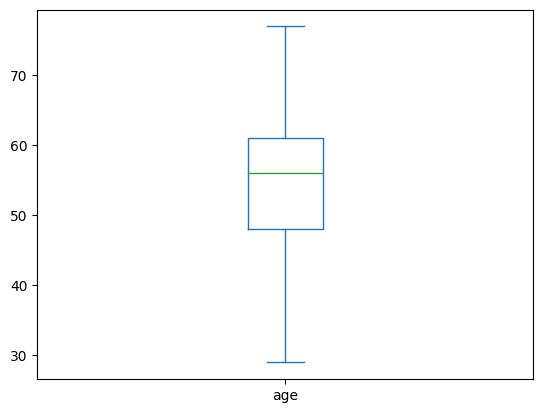

In [13]:
data["age"].plot.box()

<AxesSubplot:>

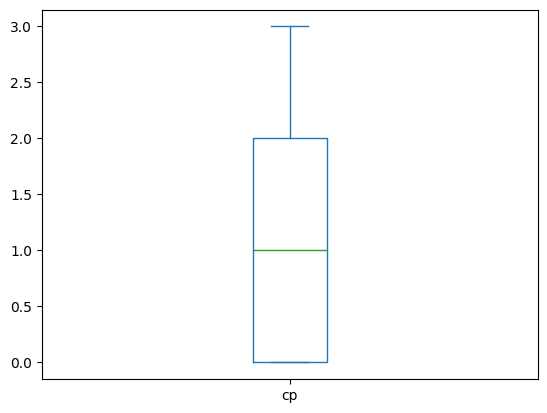

In [15]:
data["cp"].plot.box()

<AxesSubplot:>

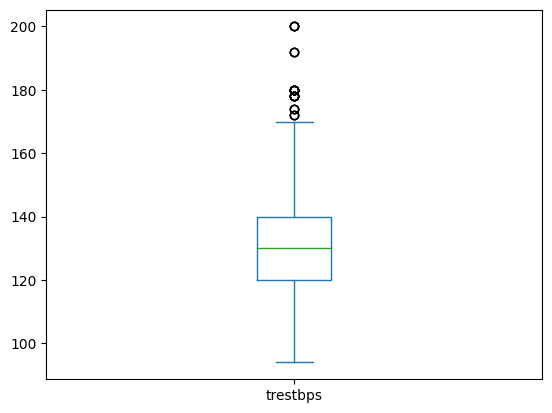

In [16]:
data["trestbps"].plot.box()

In [18]:
data["trestbps"].quantile([0.1,0.2,0.5,0.6,0.75,0.8,0.9,0.95])

0.10    110.0
0.20    120.0
0.50    130.0
0.60    134.0
0.75    140.0
0.80    144.0
0.90    152.0
0.95    163.2
Name: trestbps, dtype: float64

In [19]:
max_threshold = data["trestbps"].quantile(0.95)

In [20]:
max_threshold

163.19999999999982

In [21]:
data = data[data["trestbps"]<max_threshold]

In [22]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,54.175745,0.701953,0.943474,129.229188,244.970195,0.131552,0.536485,149.341213,0.325797,1.042343,1.406989,0.748201,2.312436,0.527235
std,9.187627,0.457636,1.016272,14.364304,51.768300,0.338177,0.521113,23.015175,0.468913,1.149054,0.610970,1.028058,0.612809,0.499514
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,167.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,160.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

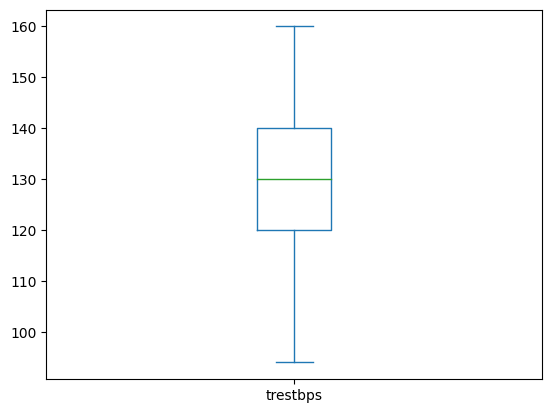

In [23]:
data["trestbps"].plot.box()

<AxesSubplot:>

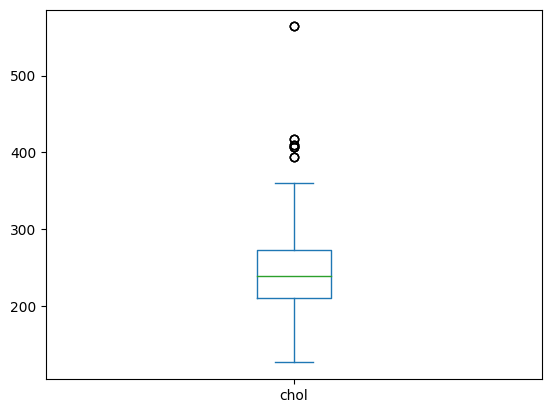

In [24]:
data["chol"].plot.box()

In [25]:
data["chol"].quantile([0.5,0.65,0.75,0.8,0.9,0.95])

0.50    239.0
0.65    258.0
0.75    273.0
0.80    283.0
0.90    309.0
0.95    330.0
Name: chol, dtype: float64

In [27]:
max_threshold = data["chol"].quantile(0.95)
max_threshold

330.0

In [28]:
data = data[data["chol"]<max_threshold]

<AxesSubplot:>

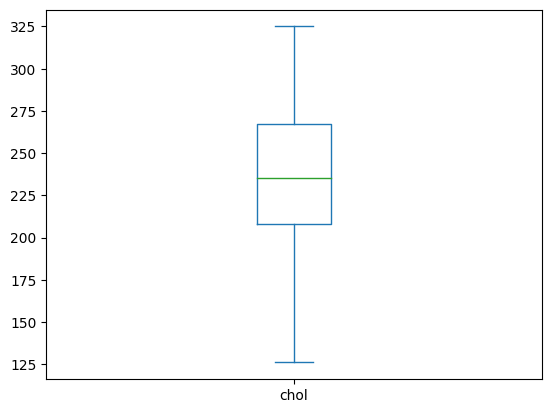

In [29]:
data["chol"].plot.box()

<AxesSubplot:>

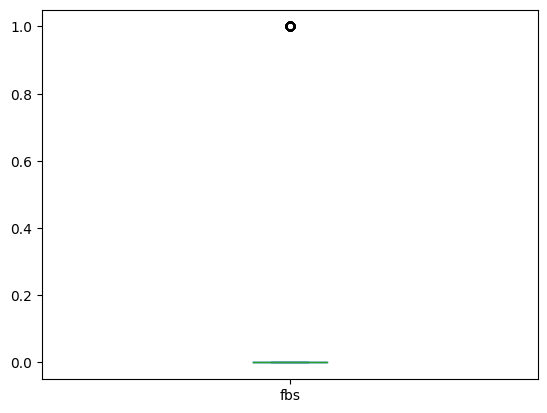

In [30]:
data["fbs"].plot.box()

In [36]:
data["fbs"].value_counts()

0    803
1    117
Name: fbs, dtype: int64

<AxesSubplot:>

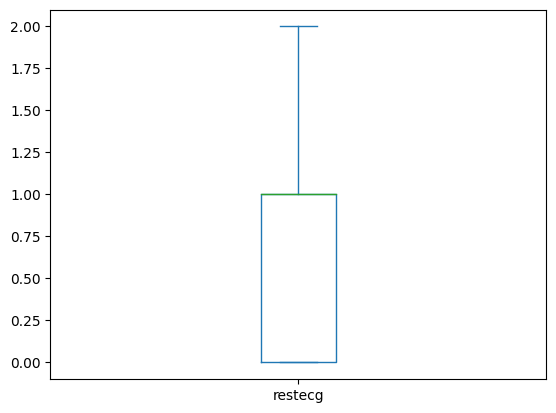

In [37]:
data["restecg"].plot.box()

<AxesSubplot:>

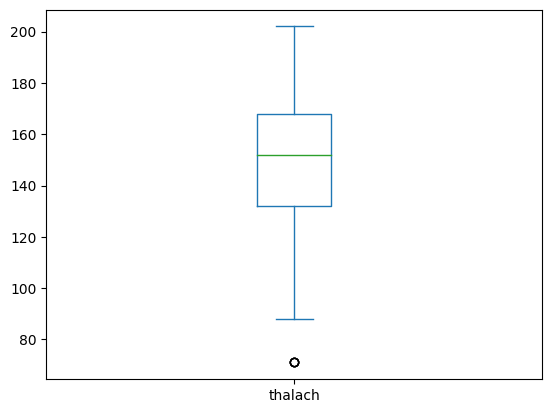

In [38]:
data["thalach"].plot.box()

In [43]:
data["thalach"].quantile([0.02,0.05,0.1,0.15,0.2,0.25,0.3,0.35])

0.02     97.00
0.05    107.90
0.10    114.90
0.15    122.85
0.20    127.00
0.25    132.00
0.30    140.00
0.35    143.00
Name: thalach, dtype: float64

In [44]:
min_threshold = data["thalach"].quantile(0.02)
min_threshold

97.0

In [45]:
data = data[data["thalach"]>min_threshold]

<AxesSubplot:>

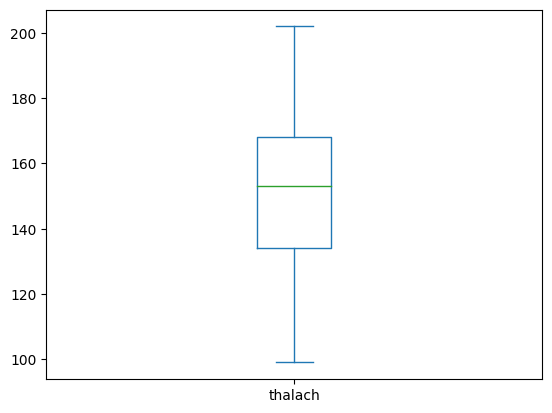

In [46]:
data["thalach"].plot.box()

<AxesSubplot:>

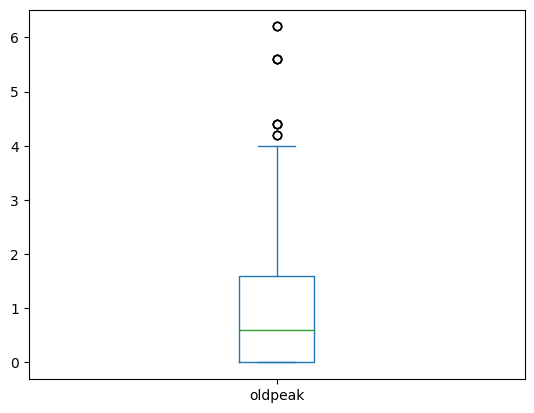

In [47]:
data["oldpeak"].plot.box()

In [48]:
data = data[data["oldpeak"]<=4]

<AxesSubplot:>

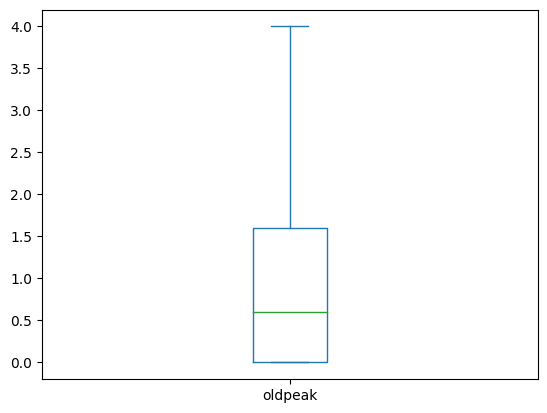

In [49]:
data["oldpeak"].plot.box()

In [50]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000
mean,53.679864,0.725113,0.981900,128.987557,237.280543,0.128959,0.528281,150.934389,0.313348,0.946041,1.429864,0.721719,2.295249,0.552036
std,9.334989,0.446710,1.021685,14.466146,40.998390,0.335345,0.515109,21.716963,0.464117,1.032066,0.596945,1.009324,0.613126,0.497566
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,0.000000,120.000000,207.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,234.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,266.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,160.000000,325.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,4.000000,3.000000,1.000000


In [51]:
new_data = data.drop("target",axis="columns")
new_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [52]:
model = LogisticRegression()

In [53]:
model.fit(new_data,data.target)

C:\Users\lenevo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
model.predict([[53,1,0,140,203,1,0,155,1,3.1,0,0,3]])

C:\Users\lenevo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [60]:
model.coef_

array([[ 0.01161763, -1.56347559,  0.85889835, -0.00719144, -0.00400449,
        -0.25559145,  0.67840853,  0.02907363, -0.89933391, -0.71354201,
         0.49290083, -0.72854012, -0.99836807]])

In [61]:
model.intercept_

array([0.04461419])

In [62]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [63]:
model.predict([[59,1,1,140,221,0,1,164,1,0.0,2,0,2]])

C:\Users\lenevo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [64]:
model.predict_proba([[59,1,1,140,221,0,1,164,1,0.0,2,0,2]])

C:\Users\lenevo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.1584378, 0.8415622]])

In [65]:
model.predict_proba([[53,1,0,140,203,1,0,155,1,3.1,0,0,3]])

C:\Users\lenevo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.98983349, 0.01016651]])